___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [2]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_confusion_matrix
from ipywidgets import interact
#data
import numpy as np
import pandas as pd
import random
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
#sklearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
#from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#model saving
import pickle
from tensorflow.keras.models import load_model

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [4]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

This session will run on CPU.


In [5]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

### EDA

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

RowNumber   CustomerId  CreditScore       Age    Tenure    Balance  \
count  10000.000    10000.000    10000.000 10000.000 10000.000  10000.000   
mean    5000.500 15690940.569      650.529    38.922     5.013  76485.889   
std     2886.896    71936.186       96.653    10.488     2.892  62397.405   
min        1.000 15565701.000      350.000    18.000     0.000      0.000   
25%     2500.750 15628528.250      584.000    32.000     3.000      0.000   
50%     5000.500 15690738.000      652.000    37.000     5.000  97198.540   
75%     7500.250 15753233.750      718.000    44.000     7.000 127644.240   
max    10000.000 15815690.000      850.000    92.000    10.000 250898.090   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  
count      10000.000  10000.000       10000.000        10000.000 10000.000  
mean           1.530      0.706           0.515       100090.240     0.204  
std            0.582      0.456           0.500        57510.493     0.403  
min            1.000      0.000           0.000           11.580     0.000  
25%            1.000      0.000           0.000        51002.110     0.000  
50%            1.000      1.000           1.000       100193.915     0.000  
75%            2.000      1.000           1.000       149388.247     0.000  
max            4.000      1.000           1.000       199992.480     1.000

In [9]:
df.describe(include=['object'])

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
#check for any duplicates
df.duplicated().sum()

0

In [12]:
# the target variable
df["Exited"].unique()

array([1, 0], dtype=int64)

In [13]:
#check for target variable balance
df["Exited"].value_counts()

#as we can see the dataset is imbalanced

Exited
0    7963
1    2037
Name: count, dtype: int64

### Missing values and Droping unwanted features

In [14]:
df.isnull().sum().any()

False

#### drop unwanted cloumns

In [15]:
#Some of the features are irrelevant and some could affect the performance so we will  drop them

#drop 'RowNumber', 'CustomerId', 'Surname': irrelevant
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

### Some Visualizations

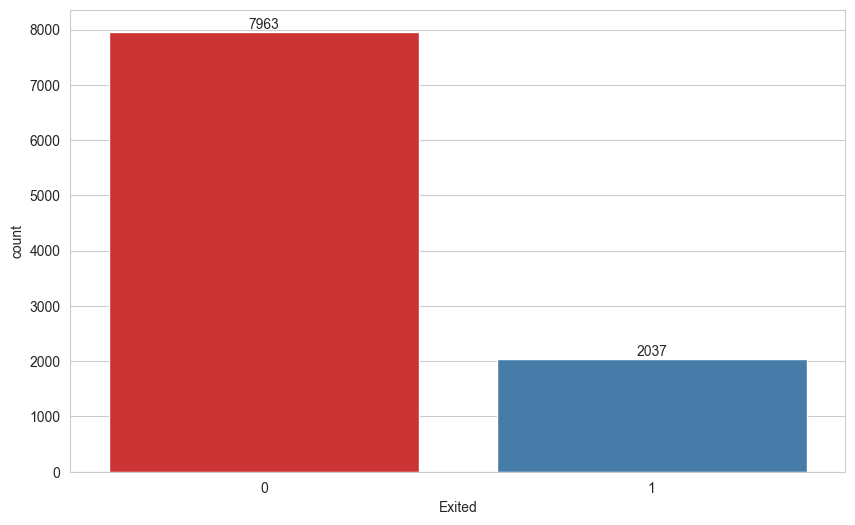

In [16]:
# value counts for the target columns
ax = sns.countplot(x='Exited', data=df, palette = "Set1")
for label in ax.containers:
    ax.bar_label(label)
plt.show()
#we can see that the data is imbalanced

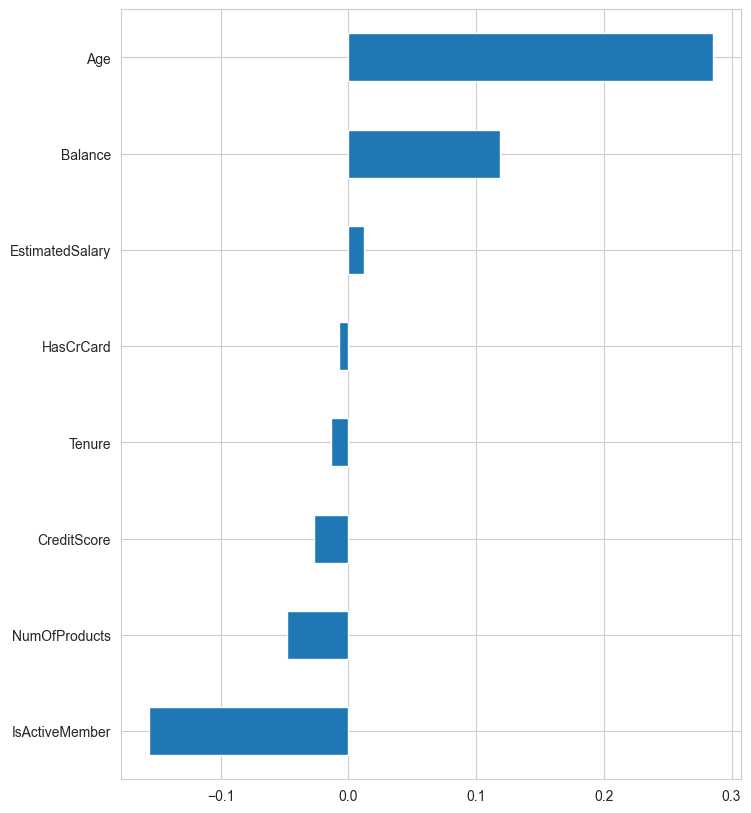

In [17]:
plt.figure(figsize=(8, 10))
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

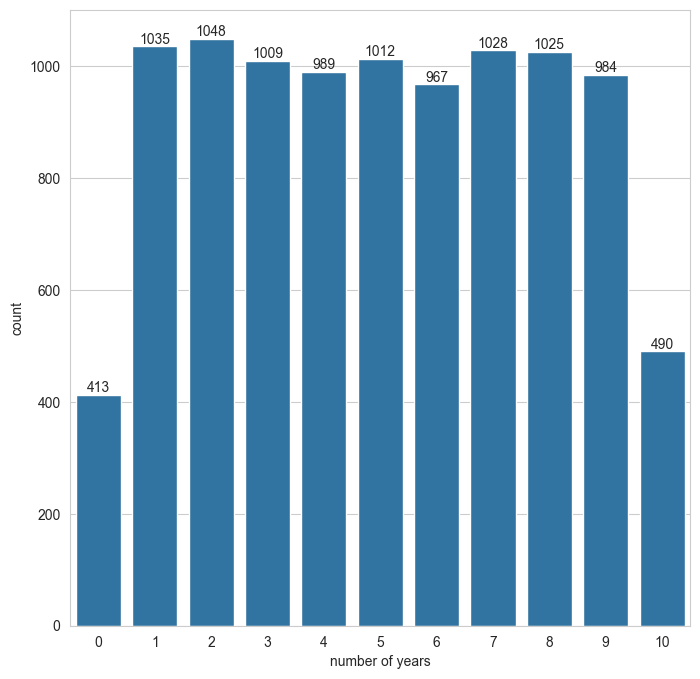

In [154]:
# see The number of years for which the customer has been with the bank.
plt.figure(figsize=(8,8))
x = sns.countplot(x ='Tenure', data = df)
plt.title('')
plt.xlabel('number of years')
x.bar_label(x.containers[0]);

In [150]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

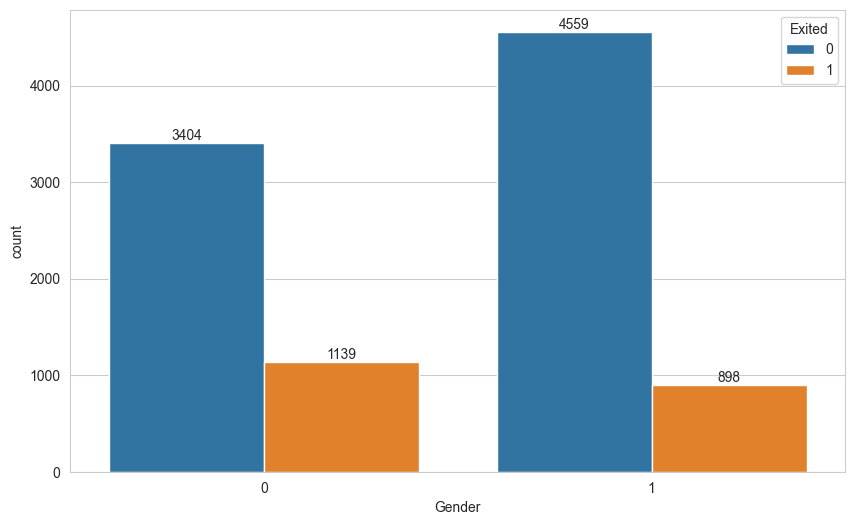

In [163]:
#see the distrebution of genders among exiting and stayed customers
ax = sns.countplot(x="Gender", data = df, hue = "Exited")
for p in ax.containers:
    ax.bar_label(p)
#female:0   /   male:1

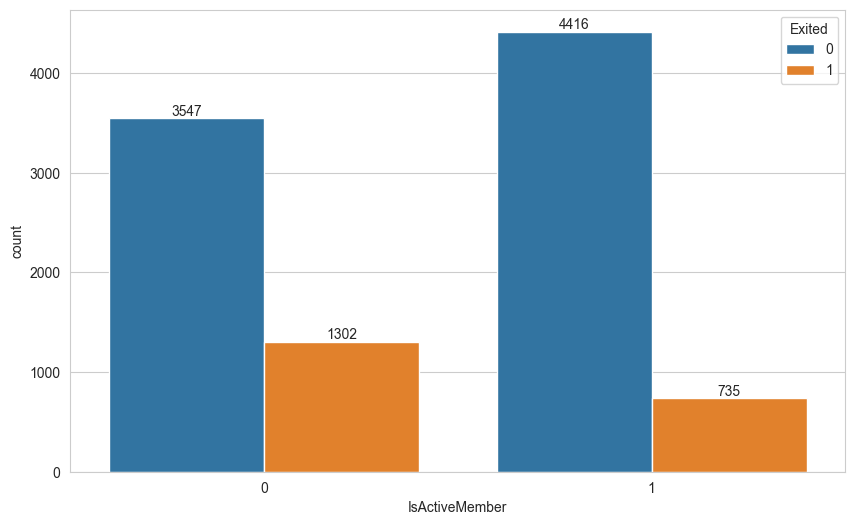

In [151]:
#does the customer was active before exiting
ax = sns.countplot(x="IsActiveMember", data = df, hue = "Exited")
for p in ax.containers:
    ax.bar_label(p)

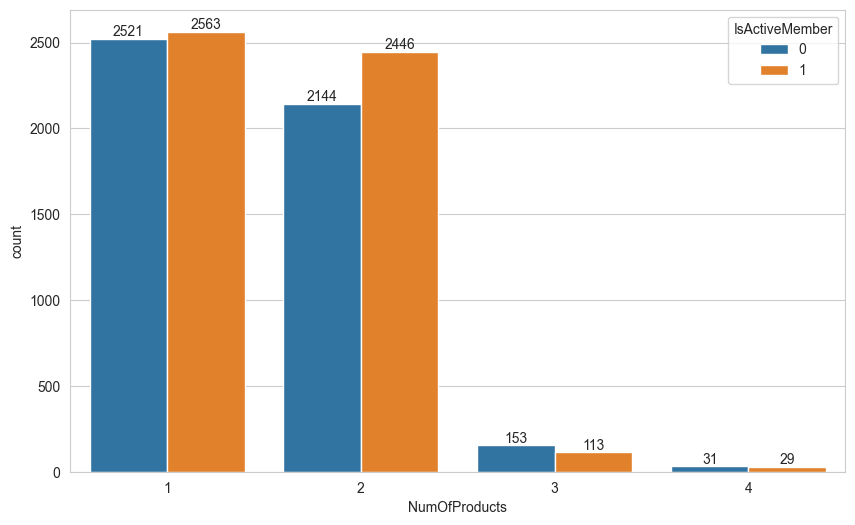

In [160]:
#how many bank products the customer is utilising whether is active or not
ax = sns.countplot(x="NumOfProducts", data = df, hue = "IsActiveMember")
for p in ax.containers:
    ax.bar_label(p)

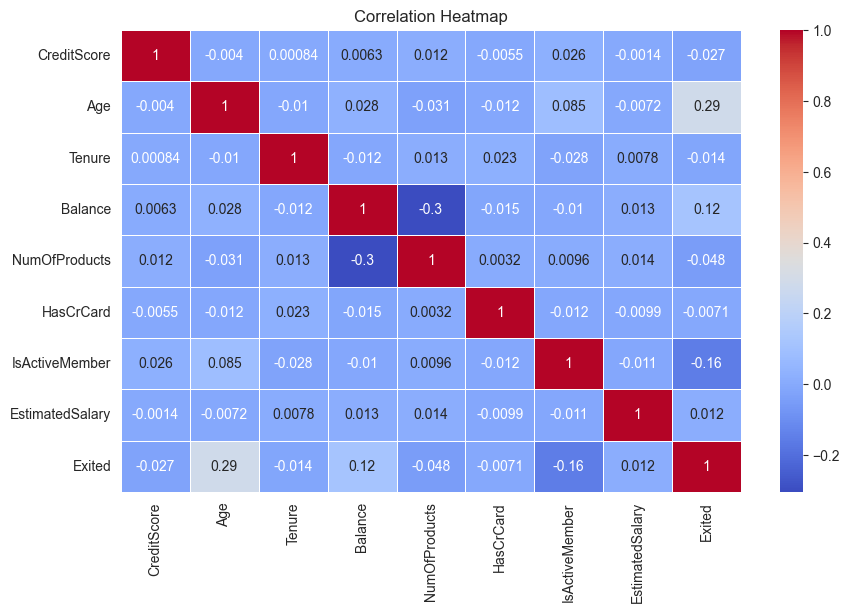

In [19]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

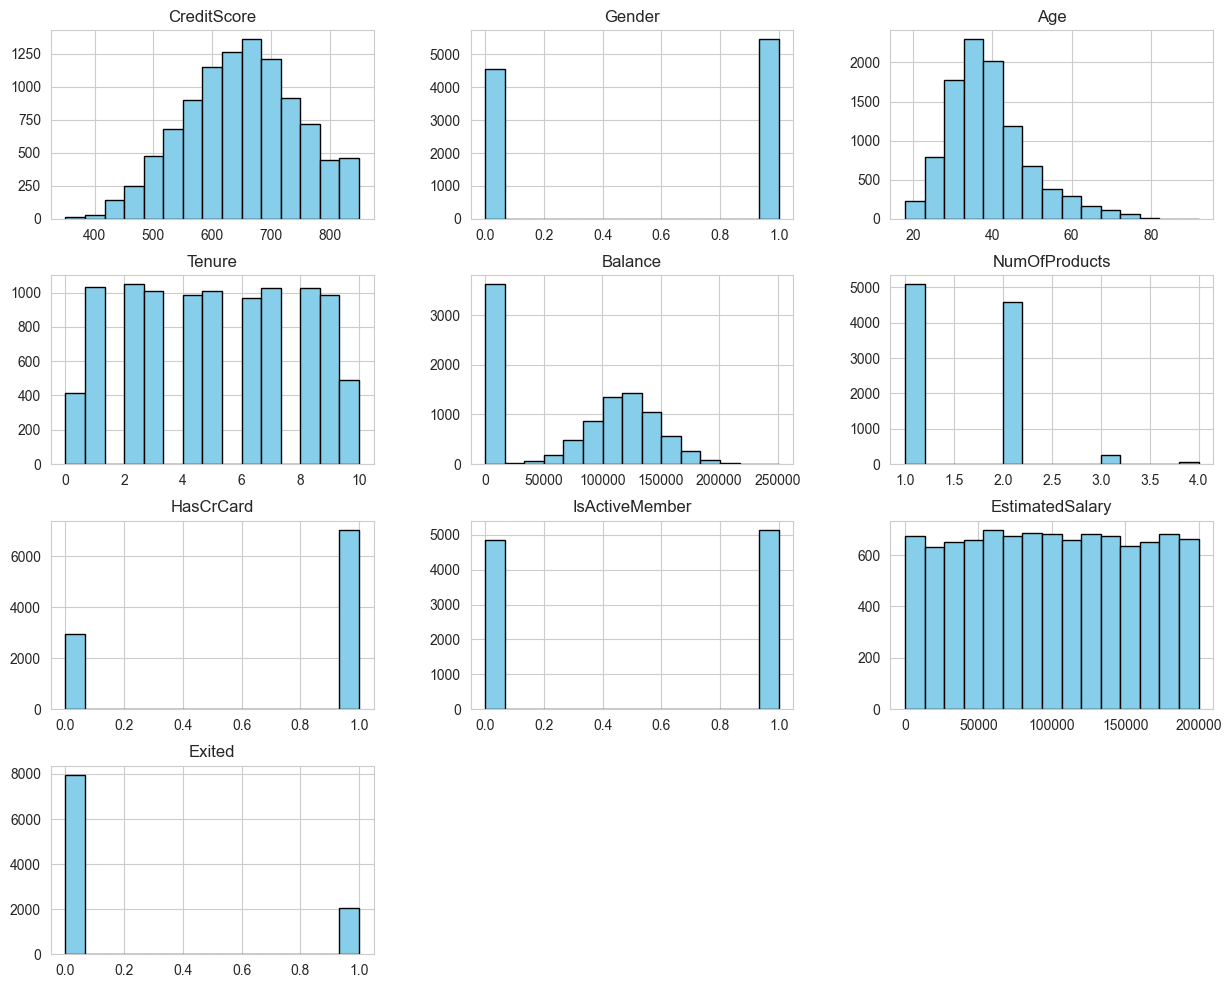

In [158]:
df.hist(figsize=(15, 12), bins=15, color='skyblue', edgecolor='black')
plt.show()

In [21]:
#box plot
def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);


interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

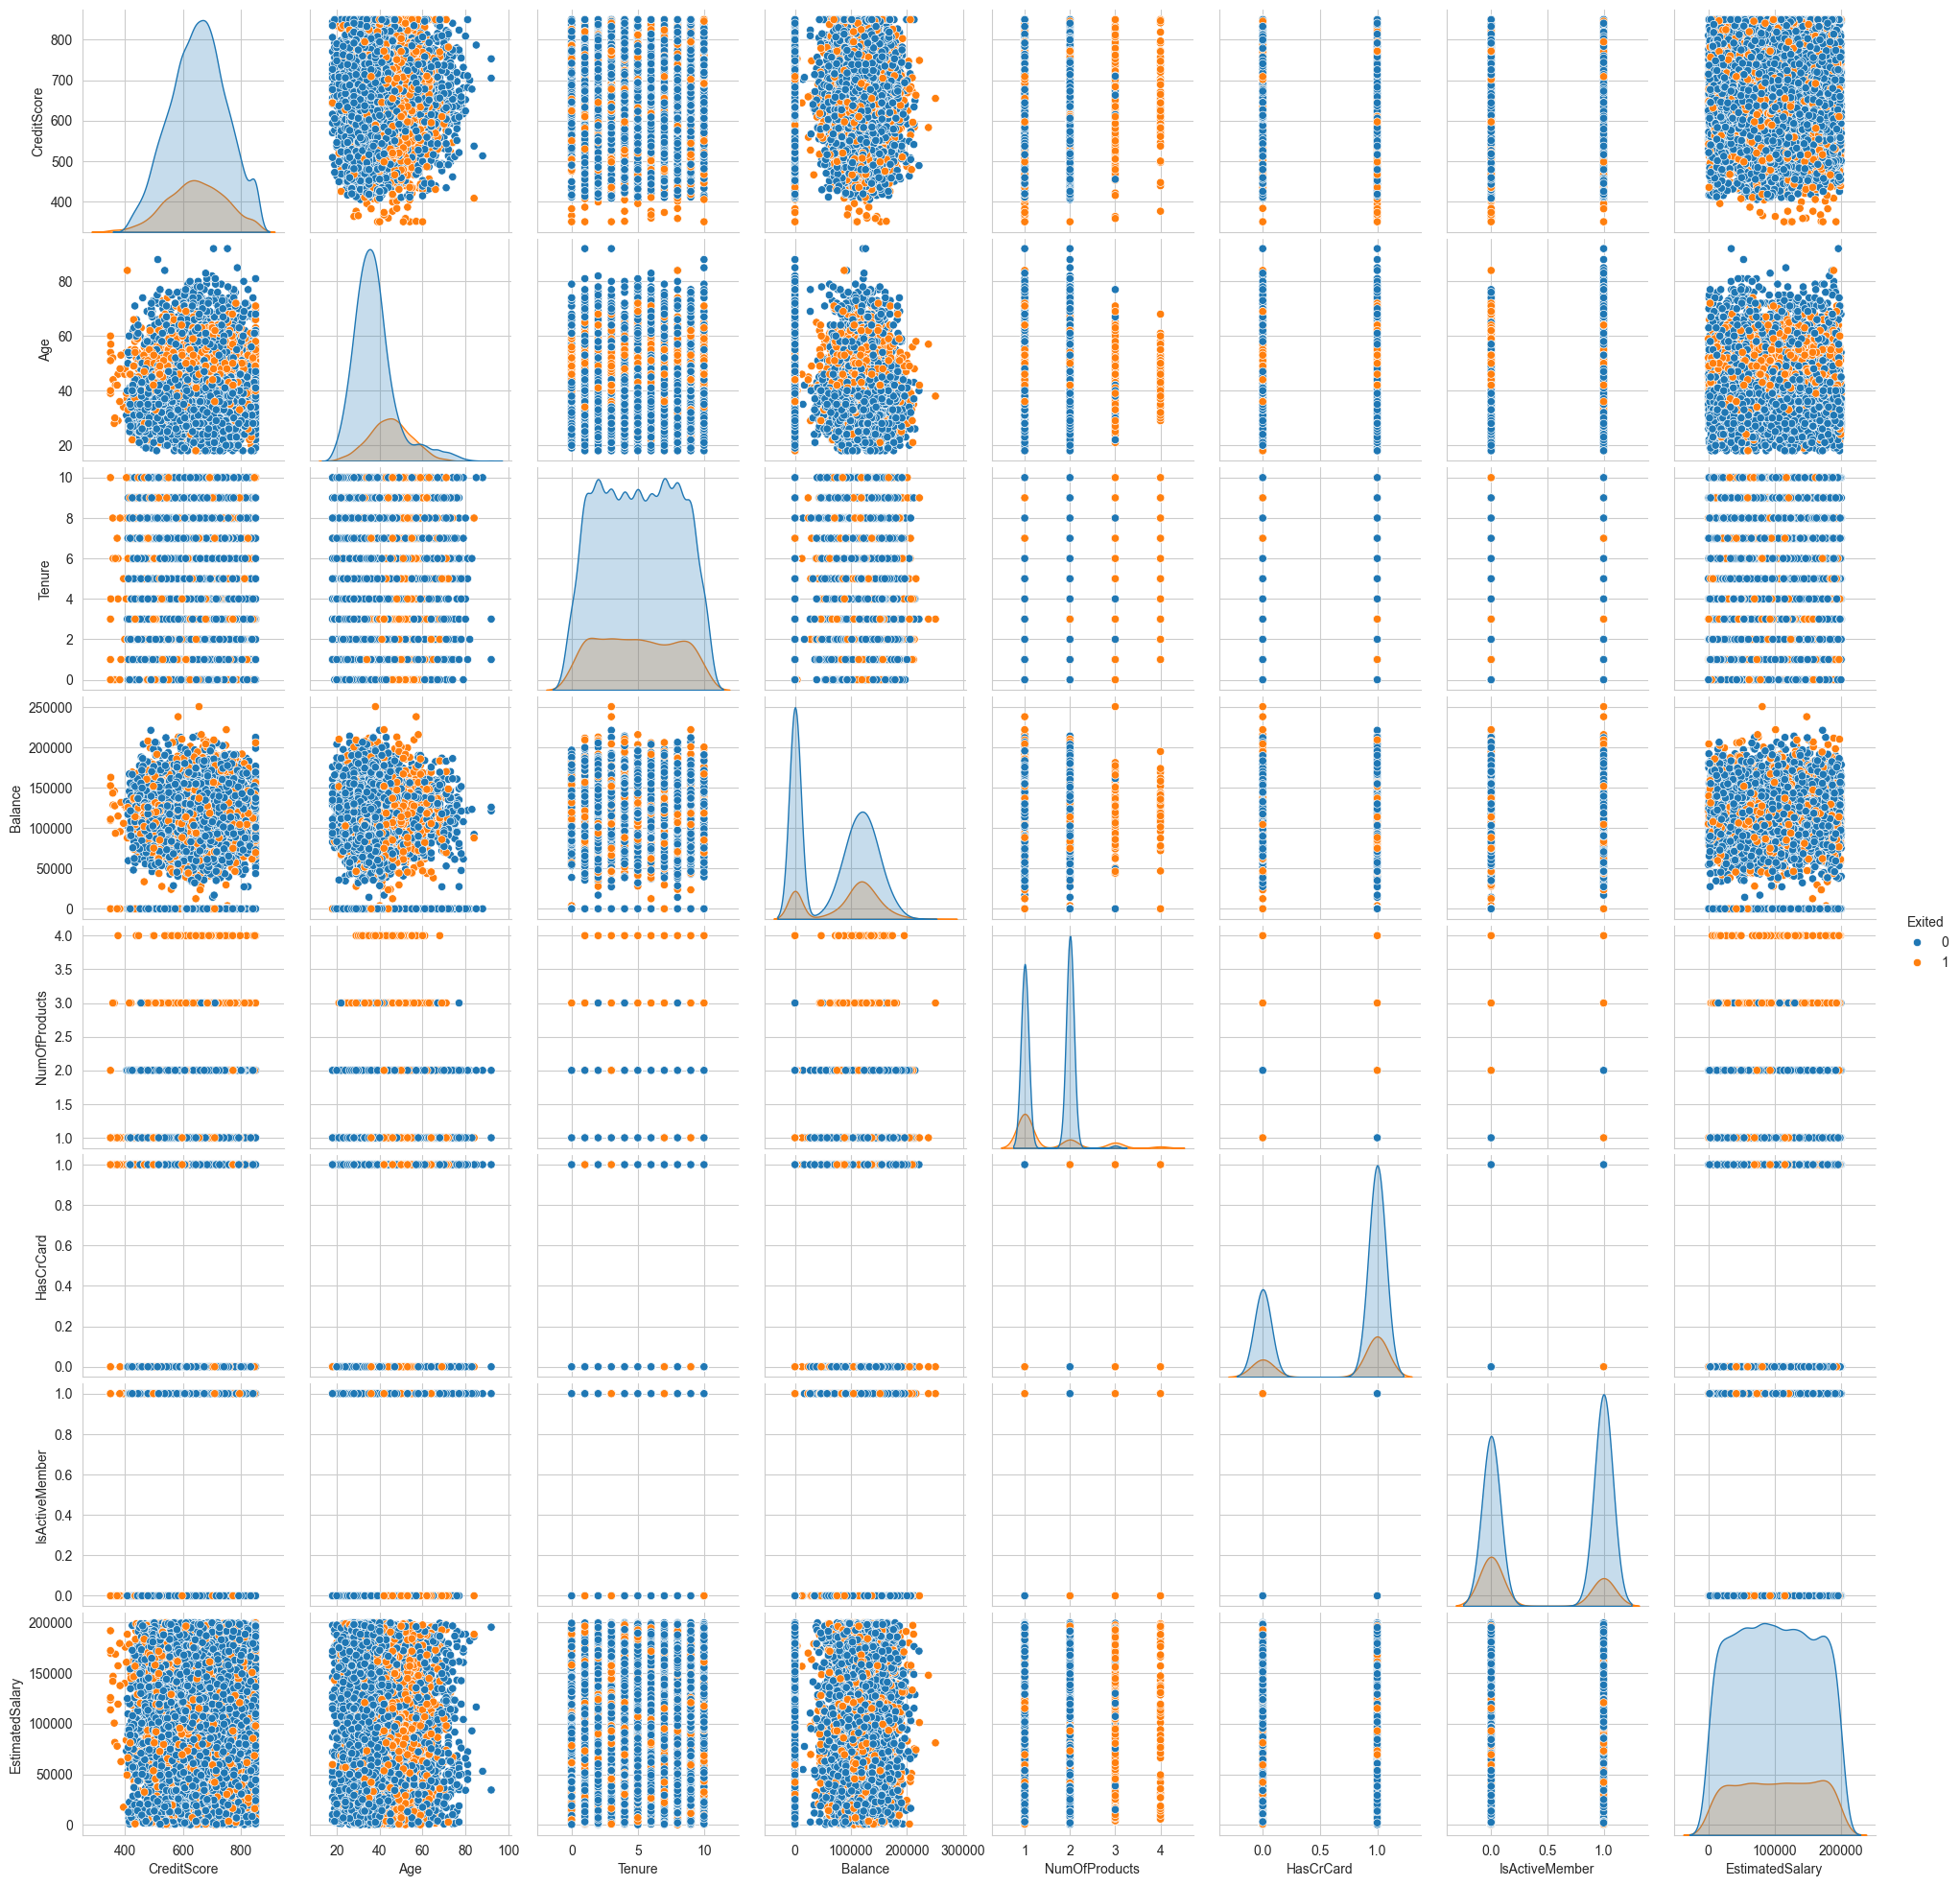

In [22]:
sns.pairplot(df, hue = 'Exited')

### Convert the Categorical variables and Scalers

In [23]:
df.select_dtypes("object").columns

Index(['Geography', 'Gender'], dtype='object')

In [24]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [25]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [26]:
df["Gender"] = df["Gender"].map({"Female":0, "Male":1})
df["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [27]:
df['CreditScore']

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [28]:
column_trans = make_column_transformer(
                (OneHotEncoder( handle_unknown='ignore',
                              sparse_output=False), 
                              ["Geography"]),
                (MinMaxScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']),
                              remainder = 'passthrough', #passthrough will allow the features that are already 0-1 and not in the list of any scaler to be stayed and not be removed
                              verbose_feature_names_out=False)

# Preprocessing of Data
- Train | Test Split, Scalling

In [29]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.10,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.10, 
                                                  random_state = 42,
                                                  stratify = y_train)

In [31]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)
X_val = column_trans.transform(X_val)

In [32]:
X_train.shape

(8100, 12)

In [33]:
X_test.shape

(1000, 12)

# Modelling & Model Performance

In [34]:
def roc_auc_plot(y_train, pred_train, y_test, pred_test):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

## without class_weigth

### Create The Model

In [35]:
seed = 42
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [36]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val), #use validation_data rather than validation_split, and with the val data not test data
    batch_size=64,
    epochs=300,
    verbose=1,
)
#everytime you implement a DL model you should use early stoping. but here for
# the purpose of learning we did not

#after doing some experments i noticed that these values of batch_size and epochs are good for our data

Epoch 1/300
127/127 [==============================] - 2s 5ms/step - loss: 0.5992 - recall: 0.0352 - val_loss: 0.5018 - val_recall: 0.0000e+00
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4884 - recall: 0.0000e+00 - val_loss: 0.4847 - val_recall: 0.0000e+00
Epoch 3/300
127/127 [==============================] - 1s 6ms/step - loss: 0.4706 - recall: 0.0000e+00 - val_loss: 0.4734 - val_recall: 0.0000e+00
Epoch 4/300
127/127 [==============================] - 1s 5ms/step - loss: 0.4593 - recall: 0.0382 - val_loss: 0.4672 - val_recall: 0.0984
Epoch 5/300
127/127 [==============================] - 1s 4ms/step - loss: 0.4482 - recall: 0.0994 - val_loss: 0.4540 - val_recall: 0.1093
Epoch 6/300
127/127 [==============================] - 1s 4ms/step - loss: 0.4359 - recall: 0.1485 - val_loss: 0.4435 - val_recall: 0.1311
Epoch 7/300
127/127 [==============================] - 0s 4ms/step - loss: 0.4272 - recall: 0.2012 - val_loss: 0.4382 - val_recall: 0.1639
Epoch 8

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1017 (3.97 KB)
Trainable params: 1017 (3.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

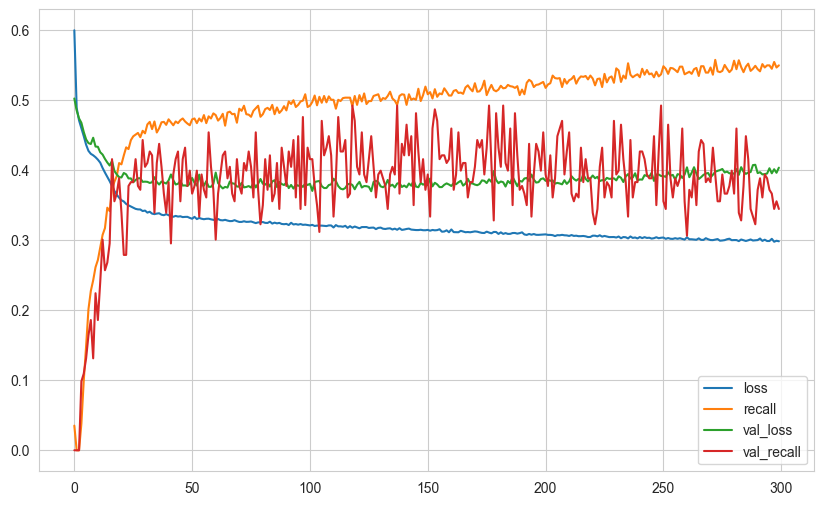

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [39]:
loss, no_weight_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", no_weight_recall)

loss:  0.35156792402267456
accuracy:  0.45098039507865906


In [40]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 1s 2ms/step
[[6286  164]
 [ 798  852]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6450
           1       0.84      0.52      0.64      1650

    accuracy                           0.88      8100
   macro avg       0.86      0.75      0.78      8100
weighted avg       0.88      0.88      0.87      8100



In [41]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[766  30]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



In [42]:
roc_auc_score(y_test, y_pred)

0.7066459749729037

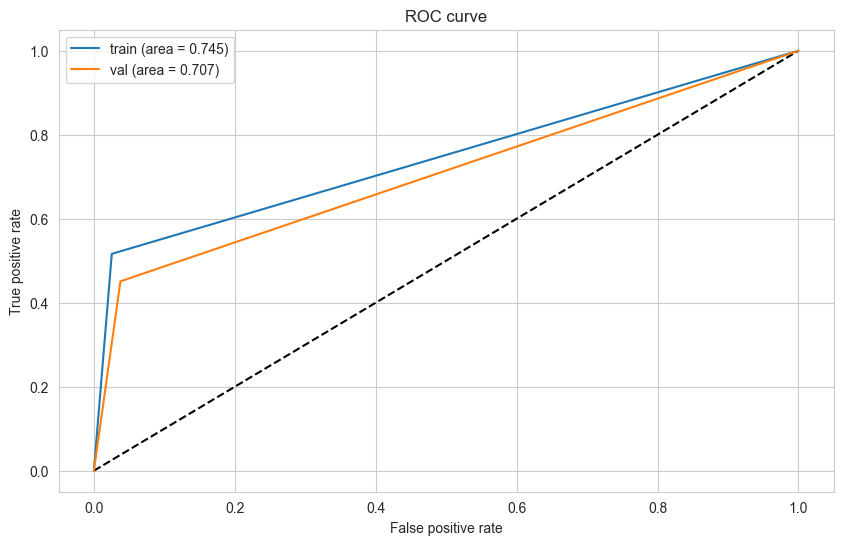

In [43]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [44]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [45]:
class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [46]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [47]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=300,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/300
127/127 [==============================] - 2s 6ms/step - loss: 0.6766 - recall: 0.8412 - val_loss: 0.7084 - val_recall: 0.6448
Epoch 2/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6434 - recall: 0.7442 - val_loss: 0.6972 - val_recall: 0.6776
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6210 - recall: 0.7267 - val_loss: 0.6938 - val_recall: 0.6776
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.6061 - recall: 0.7085 - val_loss: 0.7110 - val_recall: 0.7322
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5879 - recall: 0.7188 - val_loss: 0.6773 - val_recall: 0.7213
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5713 - recall: 0.7497 - val_loss: 0.6259 - val_recall: 0.6612
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5491 - recall: 0.7630 - val_loss: 0.6055 - val_recall: 0.6339
Epoch 8/300
127/127 [======

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 4)                 68        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 1017 (3.97 KB)
Trainable params: 1017 (3.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

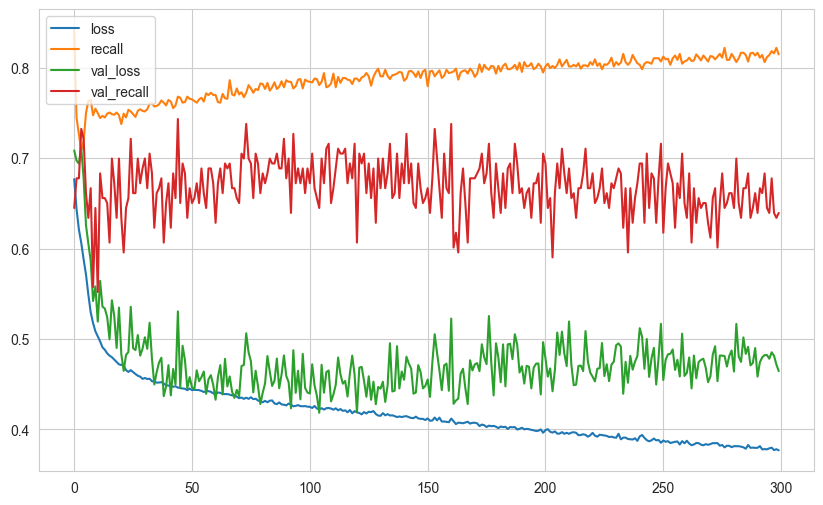

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [50]:
loss, wieght_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", wieght_recall)

loss:  0.45399656891822815
accuracy:  0.6813725233078003


In [51]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[5564  886]
 [ 331 1319]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6450
           1       0.60      0.80      0.68      1650

    accuracy                           0.85      8100
   macro avg       0.77      0.83      0.79      8100
weighted avg       0.87      0.85      0.86      8100



In [52]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[660 136]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       796
           1       0.51      0.68      0.58       204

    accuracy                           0.80      1000
   macro avg       0.71      0.76      0.72      1000
weighted avg       0.83      0.80      0.81      1000



In [53]:
roc_auc_score(y_test, y_pred)

0.755259138831412

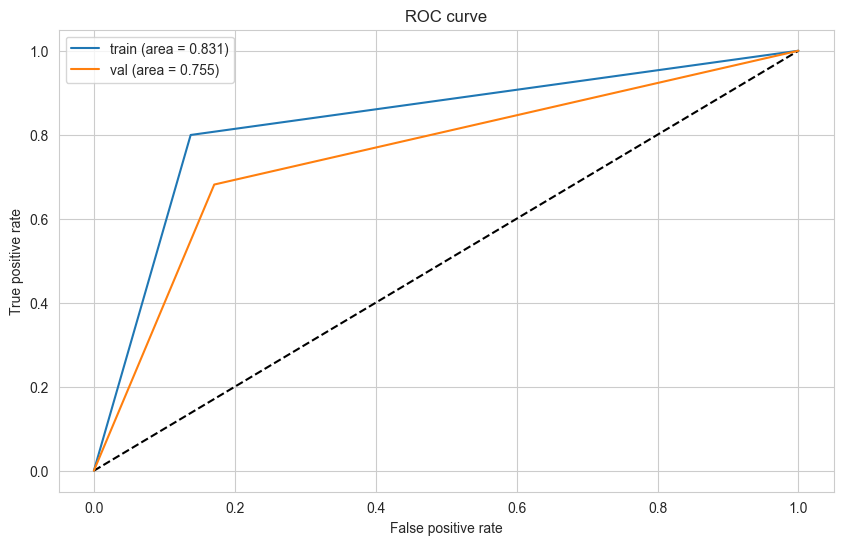

In [54]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [55]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)  # default learning rate value is 0.001 # i tried learning_rate=0.03 and the results were very bad so i decided to use smaller value
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [56]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1)

Epoch 1/300
127/127 [==============================] - 2s 6ms/step - loss: 0.6400 - recall: 0.6158 - val_loss: 0.5455 - val_recall: 0.4699
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5805 - recall: 0.7079 - val_loss: 0.4980 - val_recall: 0.5246
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5342 - recall: 0.7206 - val_loss: 0.5394 - val_recall: 0.7432
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5092 - recall: 0.7455 - val_loss: 0.5633 - val_recall: 0.7705
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.4852 - recall: 0.7515 - val_loss: 0.4612 - val_recall: 0.6776
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4802 - recall: 0.7558 - val_loss: 0.5572 - val_recall: 0.7596
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.4775 - recall: 0.7491 - val_loss: 0.4953 - val_recall: 0.6940
Epoch 8/300
127/127 [======

<Axes: >

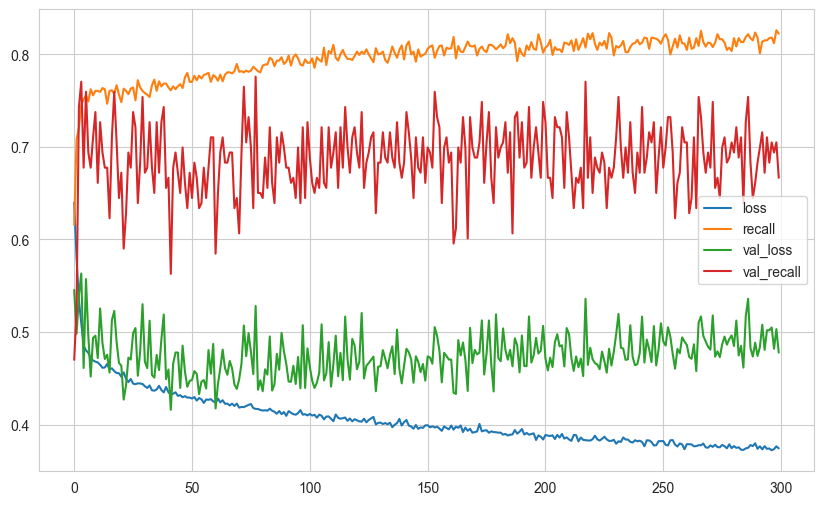

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [58]:
loss, lr_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", lr_recall)

loss:  0.4856324791908264
accuracy:  0.6960784196853638


In [59]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[5438 1012]
 [ 314 1336]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      6450
           1       0.57      0.81      0.67      1650

    accuracy                           0.84      8100
   macro avg       0.76      0.83      0.78      8100
weighted avg       0.87      0.84      0.85      8100



In [60]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[643 153]
 [ 62 142]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.70      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.82      0.79      0.80      1000



In [61]:
roc_auc_score(y_test, y_pred)

0.7519336880480836

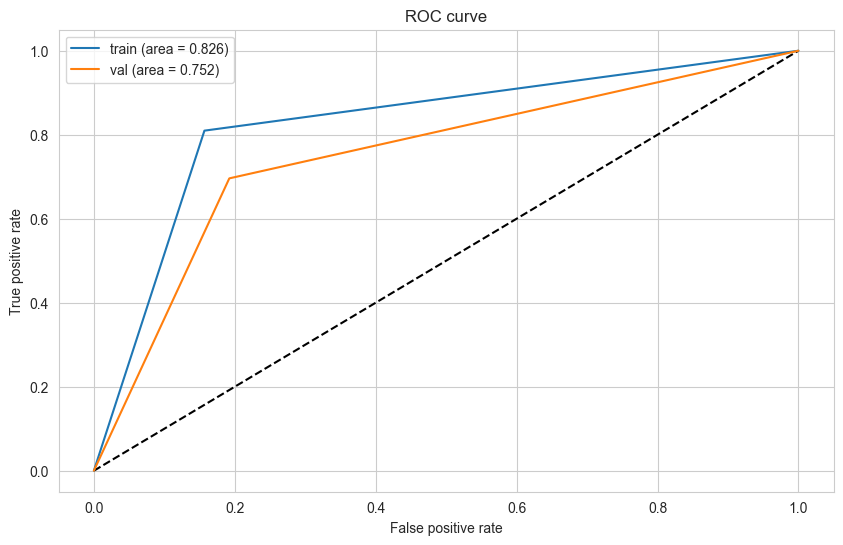

In [62]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Dropout Layer

In [63]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.15)) #this rate give better results than 0.5

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.15))

model.add(Dense(4, activation="relu"))
model.add(Dropout(0.15))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [64]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1)

Epoch 1/300
127/127 [==============================] - 2s 7ms/step - loss: 0.6838 - recall: 0.3667 - val_loss: 0.6116 - val_recall: 0.2568
Epoch 2/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6635 - recall: 0.5873 - val_loss: 0.6216 - val_recall: 0.6066
Epoch 3/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6467 - recall: 0.6867 - val_loss: 0.6261 - val_recall: 0.6667
Epoch 4/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6352 - recall: 0.6958 - val_loss: 0.6490 - val_recall: 0.7541
Epoch 5/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6265 - recall: 0.6945 - val_loss: 0.6262 - val_recall: 0.7158
Epoch 6/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6154 - recall: 0.7103 - val_loss: 0.5819 - val_recall: 0.6339
Epoch 7/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6096 - recall: 0.6721 - val_loss: 0.5693 - val_recall: 0.6066
Epoch 8/300
127/127 [======

<Axes: >

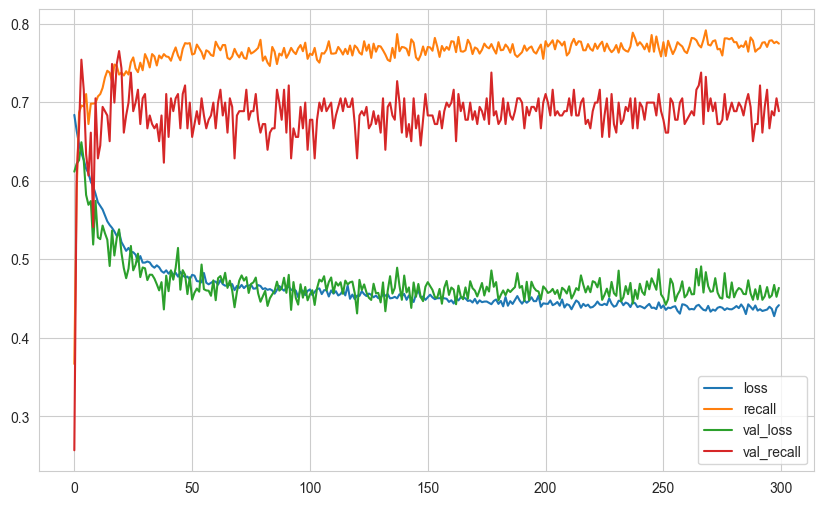

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [66]:
loss, dropout_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", dropout_recall)

loss:  0.44888752698898315
accuracy:  0.7549019455909729


In [67]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 1s 2ms/step
[[5316 1134]
 [ 315 1335]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      6450
           1       0.54      0.81      0.65      1650

    accuracy                           0.82      8100
   macro avg       0.74      0.82      0.76      8100
weighted avg       0.86      0.82      0.83      8100



In [68]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[630 166]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       796
           1       0.48      0.75      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.84      0.78      0.80      1000



In [69]:
roc_auc_score(y_test, y_pred)

0.7731796236082372

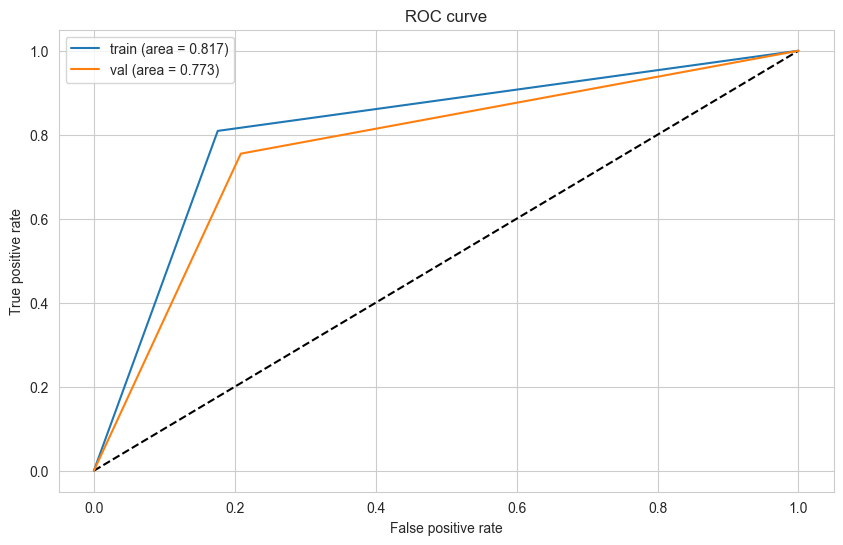

In [70]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [71]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [72]:
early_stop = EarlyStopping(monitor="val_loss", 
                           mode="min", #because i want to minimize the loss
                           verbose=1, 
                           patience=20, #wait for 20 iteration before decide to stop or not
                           restore_best_weights=True)

In [73]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 2s 6ms/step - loss: 0.6592 - recall: 0.6242 - val_loss: 0.5890 - val_recall: 0.5246
Epoch 2/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6182 - recall: 0.6752 - val_loss: 0.5993 - val_recall: 0.6776
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5943 - recall: 0.7048 - val_loss: 0.5632 - val_recall: 0.6448
Epoch 4/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5781 - recall: 0.7121 - val_loss: 0.5859 - val_recall: 0.6940
Epoch 5/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5651 - recall: 0.7055 - val_loss: 0.5563 - val_recall: 0.6448
Epoch 6/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5547 - recall: 0.7152 - val_loss: 0.5649 - val_recall: 0.6885
Epoch 7/300
127/127 [==============================] - 0s 2ms/step - loss: 0.5461 - recall: 0.7212 - val_loss: 0.5591 - val_recall: 0.6885
Epoch 8/300
127/127 [======

<Axes: >

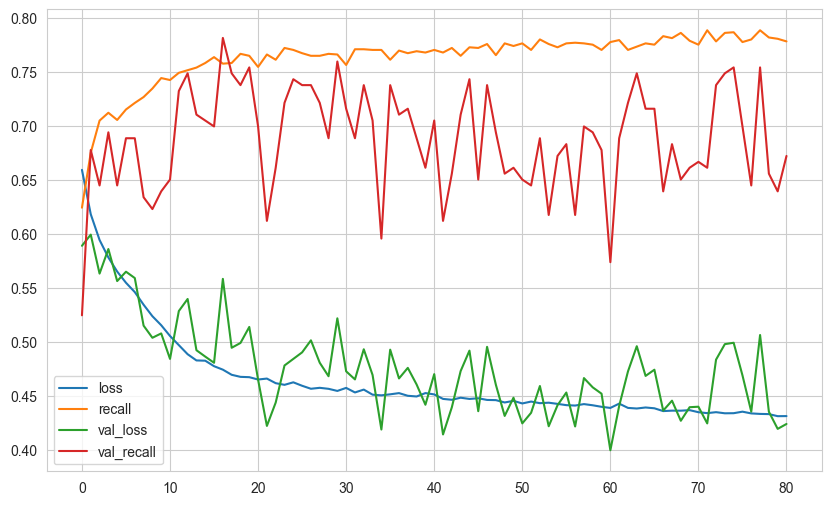

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [75]:
loss, stop_loss_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", stop_loss_recall)

loss:  0.38891470432281494
accuracy:  0.6666666865348816


In [76]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 1s 2ms/step
[[5692  758]
 [ 525 1125]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6450
           1       0.60      0.68      0.64      1650

    accuracy                           0.84      8100
   macro avg       0.76      0.78      0.77      8100
weighted avg       0.85      0.84      0.85      8100



In [77]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[693 103]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       796
           1       0.57      0.67      0.61       204

    accuracy                           0.83      1000
   macro avg       0.74      0.77      0.75      1000
weighted avg       0.84      0.83      0.83      1000



In [78]:
roc_auc_score(y_test, y_pred)

0.7686348408710216

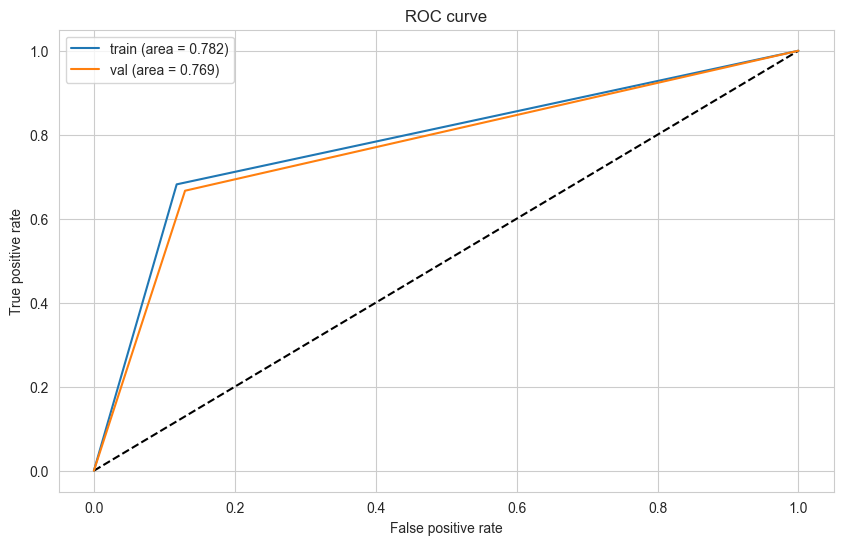

In [79]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

#### Monitor the "val_recall" as metric

In [122]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [123]:
early_stop = EarlyStopping(monitor="val_recall", 
                           mode="max", #because i want to maximize the recall
                           verbose=1, 
                           patience=20, 
                           restore_best_weights=True)

In [124]:
model.fit(x = X_train, 
          y = y_train,
          validation_data = (X_val, y_val), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 2s 6ms/step - loss: 0.6650 - recall: 0.5079 - val_loss: 0.6101 - val_recall: 0.5082
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6235 - recall: 0.6770 - val_loss: 0.6112 - val_recall: 0.6011
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5986 - recall: 0.6933 - val_loss: 0.5752 - val_recall: 0.6120
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5846 - recall: 0.7109 - val_loss: 0.6153 - val_recall: 0.6885
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5761 - recall: 0.7042 - val_loss: 0.5655 - val_recall: 0.6284
Epoch 6/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5677 - recall: 0.7127 - val_loss: 0.5724 - val_recall: 0.6448
Epoch 7/300
127/127 [==============================] - 0s 3ms/step - loss: 0.5601 - recall: 0.7133 - val_loss: 0.5592 - val_recall: 0.6393
Epoch 8/300
127/127 [======

<Axes: >

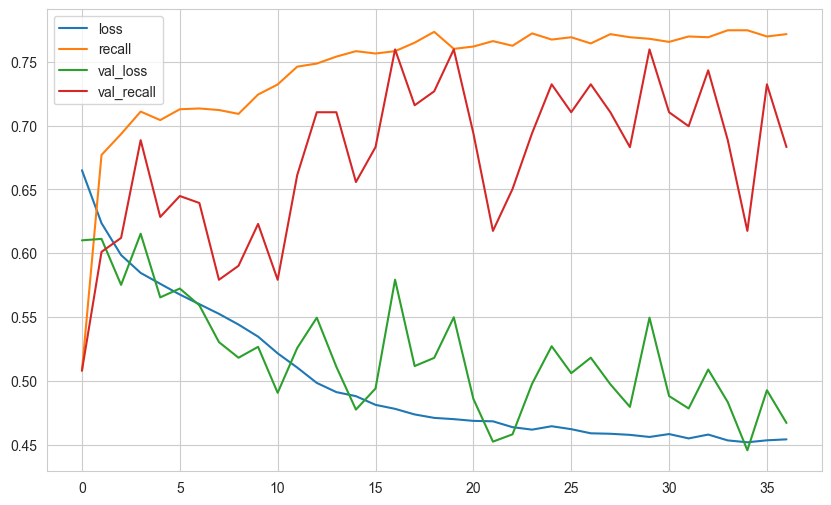

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [126]:
loss, stop_val_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", stop_val_recall)

loss:  0.5776053071022034
accuracy:  0.8088235259056091


In [127]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[4405 2045]
 [ 262 1388]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79      6450
           1       0.40      0.84      0.55      1650

    accuracy                           0.72      8100
   macro avg       0.67      0.76      0.67      8100
weighted avg       0.83      0.72      0.74      8100



In [128]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[522 274]
 [ 39 165]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       796
           1       0.38      0.81      0.51       204

    accuracy                           0.69      1000
   macro avg       0.65      0.73      0.64      1000
weighted avg       0.82      0.69      0.72      1000



In [129]:
roc_auc_score(y_test, y_pred)

0.7323012119420633

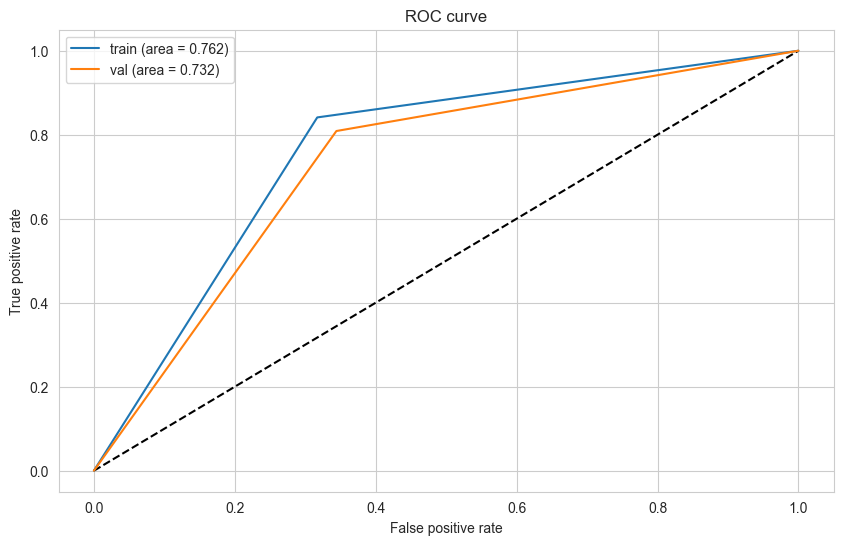

In [130]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Optuna!

In [100]:
import optuna

In [101]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [108]:
trial_metric = "Recall" #i tried to give it recall and accuracy in the same time but it gave me worse result than accuracy alone
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 16, 128) #i wanted the model to start with higher unit in the begining that's why i chose 16 rather than 8,
                                                      #however optuna will work and decide which values are the best 
    n_units2 = trial.suggest_int("n_units2", 16, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001, 0.05)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.5, 2.5)
    w1 = trial.suggest_loguniform("w1", 2.5, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=300,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]# Mr. orion said it's wrong to evaluate using test set and we should use train ineasted of test
    return score

In [114]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 17:23:20,149] A new study created in memory with name: no-name-7aabcb04-be04-4183-9c13-47f070c17019


Restoring model weights from the end of the best epoch: 45.
Epoch 60: early stopping


[I 2023-10-30 17:23:38,175] Trial 0 finished with value: 0.5733333230018616 and parameters: {'n_units1': 48, 'n_units2': 27, 'n_units3': 67, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.025668040794992374, 'w0': 0.8337597610484785, 'w1': 2.508684002534696}. Best is trial 0 with value: 0.5733333230018616.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-30 17:23:53,067] Trial 1 finished with value: 0.6696969866752625 and parameters: {'n_units1': 128, 'n_units2': 98, 'n_units3': 47, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.003469624436461203, 'w0': 1.7641340197715965, 'w1': 2.728013304645249}. Best is trial 1 with value: 0.6696969866752625.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:23:59,688] Trial 2 finished with value: 0.7957575917243958 and parameters: {'n_units1': 76, 'n_units2': 16, 'n_units3': 10, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.04720677993803583, 'w0': 1.171587264248009, 'w1': 4.712585518658967}. Best is trial 2 with value: 0.7957575917243958.


Restoring model weights from the end of the best epoch: 18.
Epoch 33: early stopping


[I 2023-10-30 17:24:10,905] Trial 3 finished with value: 0.7654545307159424 and parameters: {'n_units1': 17, 'n_units2': 33, 'n_units3': 55, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.002413305514329521, 'w0': 1.6632152381877867, 'w1': 4.695540710716885}. Best is trial 2 with value: 0.7957575917243958.


Restoring model weights from the end of the best epoch: 12.
Epoch 27: early stopping


[I 2023-10-30 17:24:20,505] Trial 4 finished with value: 0.7636363506317139 and parameters: {'n_units1': 68, 'n_units2': 33, 'n_units3': 29, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0019360753015144065, 'w0': 1.1226986168546298, 'w1': 3.354089461541277}. Best is trial 2 with value: 0.7957575917243958.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 17:24:27,437] Trial 5 finished with value: 0.004848484881222248 and parameters: {'n_units1': 61, 'n_units2': 79, 'n_units3': 105, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0066128697500814045, 'w0': 1.6267208713816081, 'w1': 4.041272646201614}. Best is trial 2 with value: 0.7957575917243958.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 17:24:36,981] Trial 6 finished with value: 0.6054545640945435 and parameters: {'n_units1': 116, 'n_units2': 91, 'n_units3': 72, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.027984107970074307, 'w0': 1.7861314406488291, 'w1': 2.5821601304813093}. Best is trial 2 with value: 0.7957575917243958.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 17:24:43,124] Trial 7 finished with value: 0.7054545283317566 and parameters: {'n_units1': 101, 'n_units2': 105, 'n_units3': 41, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.009599388583389167, 'w0': 1.2463352364259108, 'w1': 2.6701740157383536}. Best is trial 2 with value: 0.7957575917243958.


Restoring model weights from the end of the best epoch: 97.
Epoch 112: early stopping


[I 2023-10-30 17:25:16,252] Trial 8 finished with value: 0.6642424464225769 and parameters: {'n_units1': 85, 'n_units2': 21, 'n_units3': 104, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.001383106047616024, 'w0': 0.5812147077896914, 'w1': 2.673409512707999}. Best is trial 2 with value: 0.7957575917243958.


Restoring model weights from the end of the best epoch: 5.
Epoch 20: early stopping


[I 2023-10-30 17:25:25,511] Trial 9 finished with value: 0.8321211934089661 and parameters: {'n_units1': 52, 'n_units2': 16, 'n_units3': 116, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0013431038648109674, 'w0': 1.174647647510485, 'w1': 3.159121547204703}. Best is trial 9 with value: 0.8321211934089661.


{'n_units1': 52,
 'n_units2': 16,
 'n_units3': 116,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.0013431038648109674,
 'w0': 1.174647647510485,
 'w1': 3.159121547204703}

In [93]:
#pip install plotly

### build a model with the best hyperparameters

In [115]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=300,
    callbacks=[early_stop],
    class_weight= {0: w0, 1:w1},
    verbose=1,
)

Epoch 1/300
127/127 [==============================] - 1s 4ms/step - loss: 0.9871 - recall: 0.3358 - val_loss: 0.5410 - val_recall: 0.4208
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.9199 - recall: 0.5182 - val_loss: 0.4808 - val_recall: 0.3661
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.8815 - recall: 0.5491 - val_loss: 0.5094 - val_recall: 0.5464
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.8500 - recall: 0.5927 - val_loss: 0.4411 - val_recall: 0.4098
Epoch 5/300
127/127 [==============================] - 0s 4ms/step - loss: 0.8273 - recall: 0.6024 - val_loss: 0.5771 - val_recall: 0.7322
Epoch 6/300
127/127 [==============================] - 0s 3ms/step - loss: 0.7979 - recall: 0.6285 - val_loss: 0.4784 - val_recall: 0.6339
Epoch 7/300
127/127 [==============================] - 0s 4ms/step - loss: 0.7793 - recall: 0.6424 - val_loss: 0.4595 - val_recall: 0.6284
Epoch 8/300
127/127 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

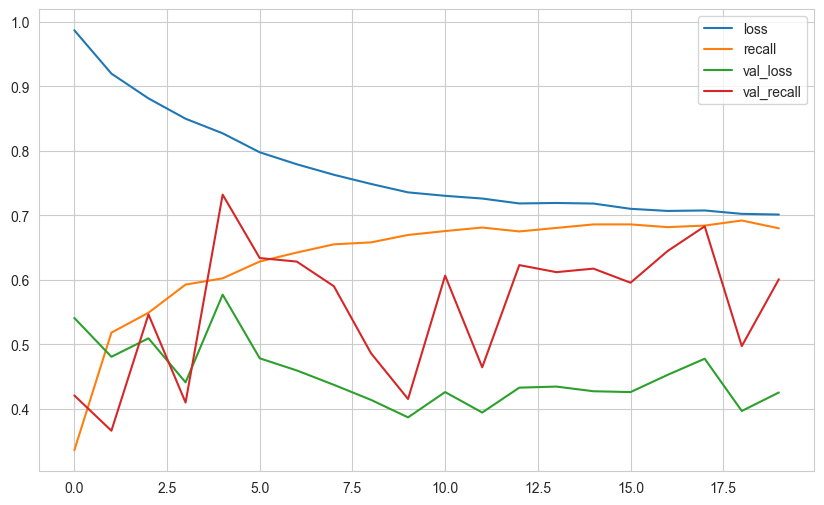

In [116]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [117]:
loss, optuna_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", optuna_recall)

loss:  0.5869114398956299
accuracy:  0.7647058963775635


In [118]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

254/254 [==============================] - 0s 1ms/step
[[4484 1966]
 [ 356 1294]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.79      6450
           1       0.40      0.78      0.53      1650

    accuracy                           0.71      8100
   macro avg       0.66      0.74      0.66      8100
weighted avg       0.82      0.71      0.74      8100



In [119]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[533 263]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       796
           1       0.37      0.76      0.50       204

    accuracy                           0.69      1000
   macro avg       0.64      0.72      0.64      1000
weighted avg       0.81      0.69      0.72      1000



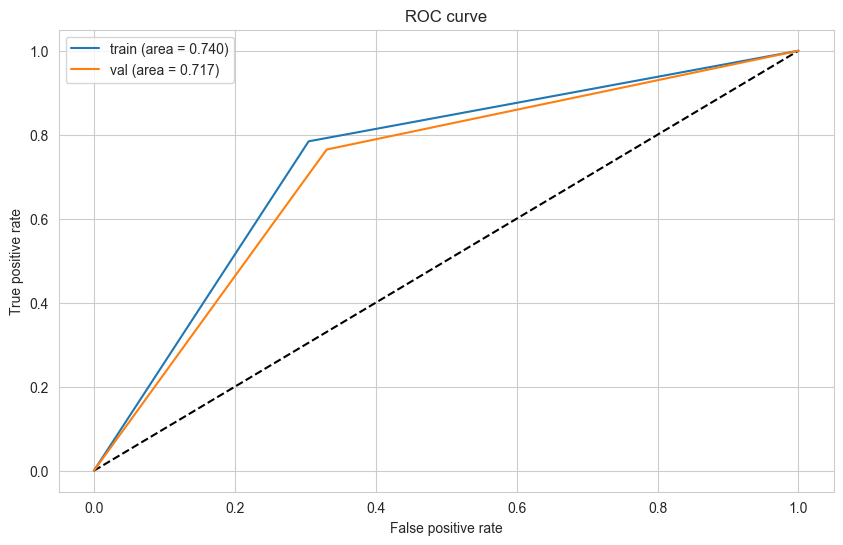

In [120]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Model comparasion

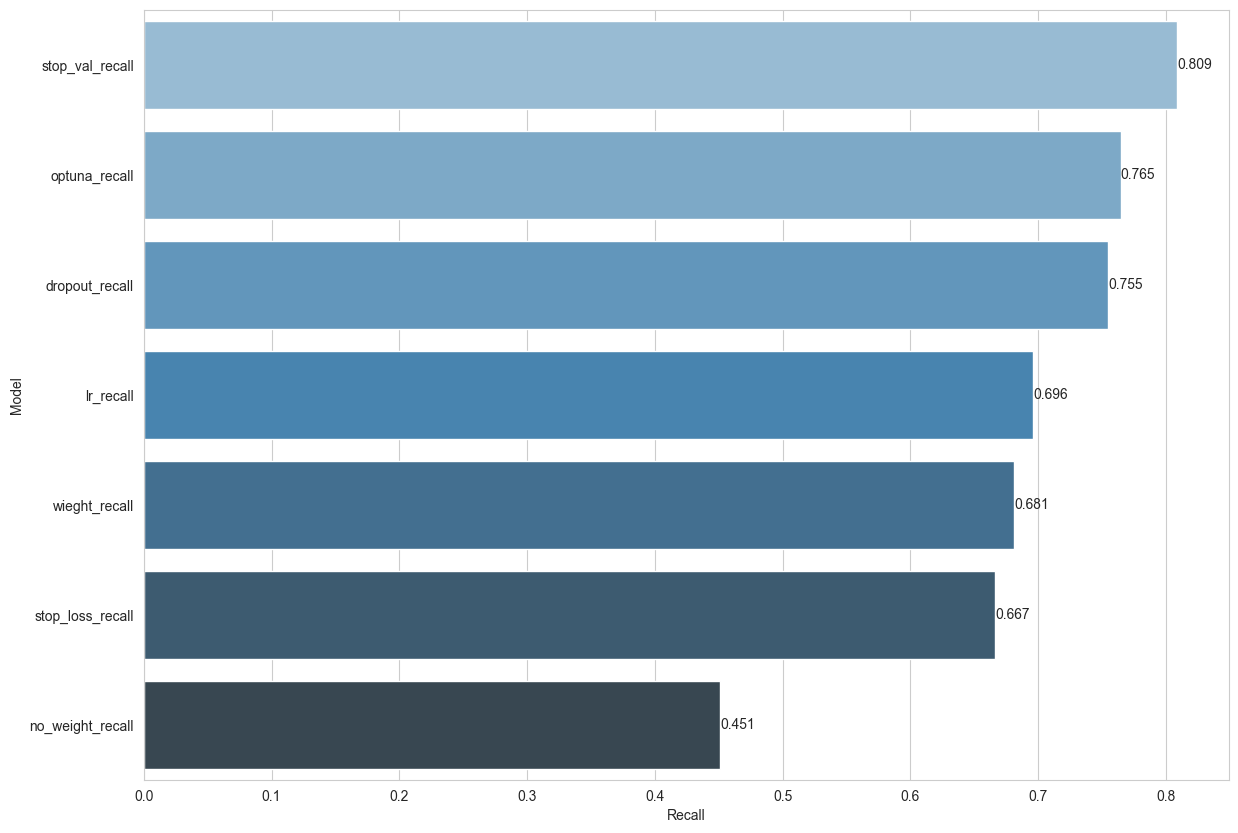

In [131]:
compare = pd.DataFrame(
    {
        "Model": ["wieght_recall", "no_weight_recall", "lr_recall", "dropout_recall", "stop_loss_recall","stop_val_recall", "optuna_recall"],
        "Recall": [wieght_recall, no_weight_recall, lr_recall, dropout_recall, stop_loss_recall,stop_val_recall, optuna_recall],
    }
)

plt.figure(figsize=(14, 10))
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
for label in ax.containers:
    ax.bar_label(label, fmt="%.3f")

### I decided to go with "Early stop vall recall" model as it gave me a good recall beside an acceptable value of precision. 

The Results of class 1:- 
- Recall = 0.81
- Precesion = 0.39 
- F1 = 0.51

I'm focusing on recall because losing a customer is more costly than giving the customers promotions, but in the same time i want my model to be as good as possible in its prediction

# Final Model and Model Deployment

### Saving Final Model and Scaler

In [132]:
import pickle

pickle.dump(column_trans, open("scaler_churn_pred", "wb"))

In [133]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [135]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [136]:
tf.random.set_seed(seed)
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [137]:
early_stop = EarlyStopping(monitor="val_recall", 
                           mode="max", #because i want to maximize the recall
                           verbose=1, 
                           patience=20, 
                           restore_best_weights=True)

In [138]:
model.fit(x = X_train, 
          y = y_train,
          validation_data=(X_test, y_test), 
          batch_size = 64, 
          epochs = 300, 
          class_weight=class_weights,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/300
133/133 [==============================] - 1s 5ms/step - loss: 0.6699 - recall: 0.6921 - val_loss: 0.6924 - val_recall: 0.7320
Epoch 2/300
133/133 [==============================] - 0s 3ms/step - loss: 0.6243 - recall: 0.6626 - val_loss: 0.6267 - val_recall: 0.6569
Epoch 3/300
133/133 [==============================] - 0s 3ms/step - loss: 0.6008 - recall: 0.6771 - val_loss: 0.5899 - val_recall: 0.6471
Epoch 4/300
133/133 [==============================] - 0s 3ms/step - loss: 0.5830 - recall: 0.6956 - val_loss: 0.5590 - val_recall: 0.6340
Epoch 5/300
133/133 [==============================] - 0s 3ms/step - loss: 0.5721 - recall: 0.6927 - val_loss: 0.5897 - val_recall: 0.7157
Epoch 6/300
133/133 [==============================] - 0s 3ms/step - loss: 0.5584 - recall: 0.6979 - val_loss: 0.5642 - val_recall: 0.6895
Epoch 7/300
133/133 [==============================] - 0s 3ms/step - loss: 0.5463 - recall: 0.7187 - val_loss: 0.5555 - val_recall: 0.7190
Epoch 8/300
133/133 [======

<Axes: >

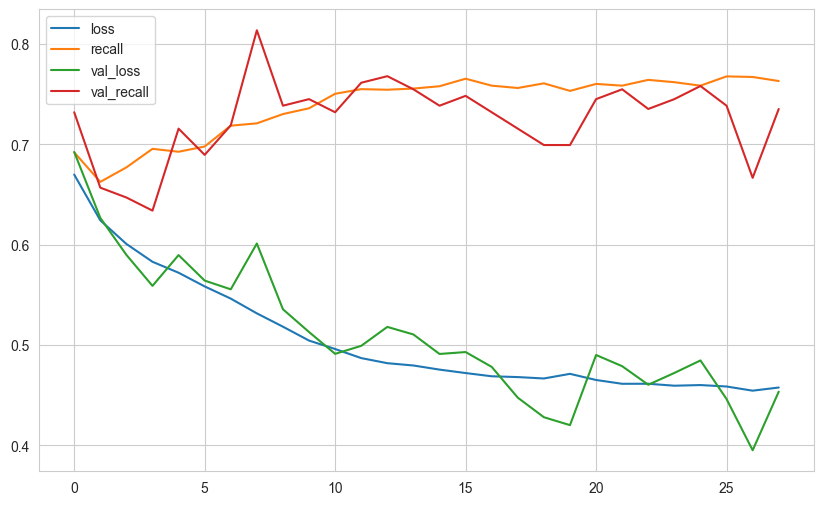

In [139]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [140]:
loss, stop_val_recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", stop_val_recall)

loss:  0.6012247204780579
accuracy:  0.813725471496582


In [141]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

47/47 [==============================] - 0s 2ms/step
[[797 397]
 [ 57 249]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78      1194
           1       0.39      0.81      0.52       306

    accuracy                           0.70      1500
   macro avg       0.66      0.74      0.65      1500
weighted avg       0.82      0.70      0.73      1500



In [142]:
roc_auc_score(y_test, y_pred)

0.7406148389003843

In [143]:
model.save("model_churn_pred.h5")  # creates a HDF5 file

### Loading Model and Scaler

In [144]:
from tensorflow.keras.models import load_model

In [145]:
model_churn_pred = load_model("model_churn_pred.h5")
scaler_churn_pred = pickle.load(open("scaler_churn_pred", "rb"))

## Prediction

In [146]:
single_customer = df.drop("Exited", axis=1).iloc[[0], :]
single_customer

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France       0   42       2    0.000              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1       101348.880

In [147]:
single_customer = scaler_churn_pred.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 0.538     , 0.32432432,
        0.2       , 0.        , 0.        , 0.50654122, 0.        ,
        1.        , 1.        ]])

In [148]:
(model_churn_pred.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 73ms/step


array([[1]])

In [149]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___